In [4]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score as exv, mean_absolute_error, mean_squared_error, r2_score#, mean_absolute_percentage_error as mape
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from autokeras import StructuredDataRegressor
from keras.models import load_model
#import h2o
#from h2o.automl import H2OAutoML
#from h2o.estimators.glm import H2OGeneralizedLinearEstimator
import tkinter as tk
from tkinter import filedialog
import os
#import pywedge as pw
from sklearn.model_selection import KFold

from IPython.display import clear_output

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import AdaBoostRegressor as ABR

import xgboost as xgb

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNetCV

from sklearn.svm import SVR

from sklearn import neighbors

from sklearn.metrics import mean_squared_error 

from math import sqrt

from keras.callbacks import EarlyStopping

from datetime import date

#%matplotlib inline

from sklearn.metrics import mean_absolute_percentage_error as mape

import statistics

import time


from sklearn import linear_model

from sklearn.linear_model import HuberRegressor

from sklearn.linear_model import OrthogonalMatchingPursuit

from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

from sklearn.linear_model import PassiveAggressiveRegressor

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [28]:
# Variáveis

# Conjunto de Dados
dominio = 'Campo'
alvo = 'Campo'

global method
method = 'Vazio'

In [29]:
# Função de Cálculo de Métricas dos Modelos de Regressão

def metricas(y_test, y_pred):
    global R2
    R2 = r2_score(y_test,y_pred)
    global MSE
    MSE = mean_squared_error(y_test,y_pred)
    global RMSE
    RMSE = MSE**0.5
    global MAE
    MAE = mean_absolute_error(y_test,y_pred)
    global MAPE
    MAPE = mape(y_test, y_pred)
    #MAPE = np.mean(np.abs(percentage_error(np.asarray(y_test), np.asarray(y_pred)))) * 100
    #y_test, y_pred = np.array(y_test), np.array(y_pred)
    #MAPE =  np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print('Method: ', method)
    print("R2 = ", R2)
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAE = ", MAE)
    print("MAPE = ", MAPE)

In [30]:
# Abre arquivo com base de dados
root = tk.Tk()
#root.withdraw() 
arquivo = filedialog.askopenfilename()
root.update()
root.destroy()
print(arquivo)

/home/peixe/simoa/dados/campo_geo/7_variaveis_campo_Campo_GEO__buffer_60m_Intervalo_2_Dias_Sentinel_2A.csv


In [31]:
# Pegando o nome do arquivo
nome_arquivo = next(iter(arquivo))
nome_arquivo = str(arquivo)
nome_arquivo

'/home/peixe/simoa/dados/campo_geo/7_variaveis_campo_Campo_GEO__buffer_60m_Intervalo_2_Dias_Sentinel_2A.csv'

In [32]:
# Lê arquivo e ajusta nome da coluna: pode ser formato Xls ou csv

if nome_arquivo.split('.')[1] == 'xlsx' or nome_arquivo.split('.')[1] == 'xls':
    dados = pd.read_excel(nome_arquivo)
    #dados.to_csv(str(nome_arquivo.split('.')[0] + '.csv'))

elif nome_arquivo.split('.')[1] == 'csv':
    dados = pd.read_csv(nome_arquivo, sep=',')

else:
    print('Formato de arquivo inválido! Utilize arquivo nos formatos .xlsx, .xls ou .csv')


dados.columns = map(lambda x: str(x).upper(), dados.columns)

dados.head(5)

,UNNAMED: 0,REGIOES,ESTACAO,DATA,CAMPANHA,HORA,SECCHI,PH,TURBIDEZ,OD,...,BAND_8,BAND_8A,BAND_9,BAND_11,BAND_12,MSK_CLDPRB,QA60,NUVEM_SOMBRA,GEOMETRY,DIFERENCA_DIAS
0,0,0.0,0.0,2019-10-04,0.0,0.0,599.0,8.20,0.24,7.40,...,133.0,134.0,145.0,84.0,69.0,0.0,0.0,SHADOW,POINT (-45.262351969 -18.223562319),0
1,1,0.0,0.0,2019-10-04,0.0,0.0,484.0,8.08,0.20,7.45,...,175.0,163.0,164.0,115.0,87.0,0.0,0.0,SHADOW,POINT (-45.265836914 -18.25096822),0
2,2,0.0,0.0,2019-10-04,0.0,0.0,448.0,8.30,0.65,7.76,...,113.0,109.0,109.0,55.0,49.0,0.0,0.0,SHADOW,POINT (-45.320379995 -18.437494562),0
3,3,0.0,0.0,2019-10-04,0.0,0.0,440.0,8.36,0.32,7.68,...,110.0,107.0,115.0,60.0,46.0,0.0,0.0,SHADOW,POINT (-45.338656225 -18.43454706),0
4,4,0.0,0.0,2019-10-04,0.0,0.0,282.0,8.51,0.53,7.81,...,117.0,103.0,94.0,57.0,38.0,0.0,0.0,CIRRUS,POINT (-45.380143266 -18.455525237),0


In [33]:
# Ajustando nome de colunas
dados.rename(columns = {'B1': 'BAND_1',
                                 'B2': 'BAND_2',
                                 'B3': 'BAND_3',
                                 'B4': 'BAND_4',
                                 'B5': 'BAND_5',
                                 'B6': 'BAND_6',
                                 'B7': 'BAND_7',
                                 'B8': 'BAND_8',
                                 'B8A': 'BAND_8A',
                                 'B9': 'BAND_9',
                                 'B11': 'BAND_11',
                                 'B12': 'BAND_12',
                        'NUVEM_SOMBRA': 'NUVEM_SOMB',
                        'CONDUTIVIDADE': 'CONDUTIV'
                                 },
                      inplace=True)

In [34]:
# CALCULO DE ÍNDICES ESCECTRAIS PARA COMPOR 12 (bandas) VARIÁVEIS DE ENTRADA

In [35]:
# NDWI - Cálculo
# Sentinel-2 NDWI = (B03 - B08) / (B03 + B08)
dados['NDWI'] = (dados['BAND_3'] - dados['BAND_8']) / (dados['BAND_3'] + dados['BAND_8'])

# -----------------------

# MNDWI
# Sentinel-2 MNDWI = (B03 - B11) / (B03 + B11)
dados['M_NDWI'] = (dados['BAND_3'] - dados['BAND_11']) / (dados['BAND_3'] + dados['BAND_11'])

# -----------------------

# SWI - Cálculo
# Sentinel-2 SWI = (B05 - B11) / (B05 + B11)
dados['SWI'] = (dados['BAND_5'] - dados['BAND_11']) / (dados['BAND_5'] + dados['BAND_11'])

# -----------------------

# MCARI (Modified Chlorophyll Absorption in Reflectance Index)
##// Modified Chlorophyll Absorption in Reflectance Index   (abbrv. MCARI)
##// General formula: ((700nm - 670nm) - 0.2 * (700nm - 550nm)) * (700nm /670nm)
##// URL https://www.indexdatabase.de/db/si-single.php?sensor_id=96&rsindex_id=41
#let index = ((B05 - B04) - 0.2 * (B05 - B03)) * (B05 / B04);
dados['MCARI'] = ((dados['BAND_5'] - dados['BAND_4']) - 0.2 * (dados['BAND_5'] - dados['BAND_3'])) * (dados['BAND_5'] / dados['BAND_4'])

# -----------------------

# NDVI
# Sentinel-2 MDVI = (B08 - B04) / (B08 + B04)
dados['NDVI'] = (dados['BAND_8'] - dados['BAND_4']) / (dados['BAND_8'] + dados['BAND_4'])

# -----------------------

# NBSI
# Non-Binary Snow Index for Multi-Component Surfaces
#NBSI = ((sample.B11 + sample.B04) - (sample.B08 + sample.B02)) / ((sample.B11 + sample.B04) + (sample.B08 + sample.B02))
dados['NBSI'] = ((dados['BAND_11'] + dados['BAND_4']) - (dados['BAND_8'] + dados['BAND_2'])) / ((dados['BAND_11'] + dados['BAND_4']) + (dados['BAND_8'] + dados['BAND_2']))

# ---------------------------

#Aquatic Plants and Algae Custom Script Detector (APA Script)
##indices to apply a mask to water bodies
## moisture = (B8A-B11)/(B8A+B11); 
## NDWI = (B03 - B08)/(B03 + B08);
## water_bodies = (NDWI-moisture)/(NDWI+moisture);
dados['MOISTURE'] = (dados['BAND_8A'] - dados['BAND_11']) / (dados['BAND_8A'] + dados['BAND_11'])
dados['WATER_BODIES'] = (dados['NDWI'] - dados['MOISTURE']) / (dados['NDWI'] + dados['MOISTURE'])

# ----------------------

#indices to identify water plants and algae

# water_plants = (B05 - B04)/(B05 + B04);
# NIR2 = B04 + (B11 - B04)*((832,8 - 664,6)/(1613,7 - 664,6));
# FAI = B08 - NIR2;
dados['WATER_PLANTS'] = (dados['BAND_5'] - dados['BAND_4']) / (dados['BAND_5'] + dados['BAND_4'])

# --------------------

dados.head()

,UNNAMED: 0,REGIOES,ESTACAO,DATA,CAMPANHA,HORA,SECCHI,PH,TURBIDEZ,OD,...,DIFERENCA_DIAS,NDWI,M_NDWI,SWI,MCARI,NDVI,NBSI,MOISTURE,WATER_BODIES,WATER_PLANTS
0,0,0.0,0.0,2019-10-04,0.0,0.0,599.0,8.20,0.24,7.40,...,0,0.476378,0.633987,0.356322,21.643523,-0.184049,-0.287001,0.229358,0.350018,-0.043243
1,1,0.0,0.0,2019-10-04,0.0,0.0,484.0,8.08,0.20,7.45,...,0,0.418605,0.575646,0.329446,25.354357,-0.158654,-0.249737,0.172662,0.415959,-0.027719
2,2,0.0,0.0,2019-10-04,0.0,0.0,448.0,8.30,0.65,7.76,...,0,0.509761,0.727047,0.471154,12.966102,-0.220690,-0.316642,0.329268,0.215121,-0.072727
3,3,0.0,0.0,2019-10-04,0.0,0.0,440.0,8.36,0.32,7.68,...,0,0.533898,0.715640,0.449541,22.519540,-0.225352,-0.315789,0.281437,0.309641,-0.048193
4,4,0.0,0.0,2019-10-04,0.0,0.0,282.0,8.51,0.53,7.81,...,0,0.582888,0.772455,0.506494,24.360000,-0.261830,-0.302578,0.287500,0.339375,-0.069519


In [36]:
# Verificação de Nuvens

In [37]:
# Dados Relacionado à Probabilidade de Nuvens
#dados['MSK_CLDPRB'].value_counts(1) # Percentual

In [38]:
# Dados Relacionado à Probabilidade de Nuvens
#dados['QA60'].value_counts(1)

In [39]:
#dados[(dados['MSK_CLDPRB']<=0.0) & (dados['QA60']<=0)]
#dados[(dados['MSK_CLDPRB']<=0.0) | (dados['QA60']<=0)]
#dados[(dados['MSK_CLDPRB']>0) & (dados['QA60']==0)]

In [40]:
#Filtros Limite de Valores Relacionados a Nuvens

print('Quer utilizar TODOS os DADOS disponíveis (SEM FILTRO DE NUVENS?)')
print('Digite 1 para SIM ou 0 para NÃO')
usar_todos_dados = int(input())

if usar_todos_dados==0:
    #print('Digite o Valor Limite da Probabilidade de Nuvem Aceitável (Valor Real. Exemplo: 10.00)')
    #valor_limite_probabilidade = float(input())

    #print('Intevelo de Dias entre a Passagem do Satélite e a Data de Coleta (inteiro)')
    #valor_QA60 = 1024.00

    #dados_filtrado = dados[(dados['MSK_CLDPRB']<=valor_limite_probabilidade) & (dados['QA60']<valor_limite_probabilidade)]
    #dados_filtrado = dados[(dados['MSK_CLDPRB']<=0.0) & (dados['QA60']<1024)]
    # dados_filtrado = dados[(dados['MSK_CLDPRB']<=0.0) & (dados['QA60']<=0)]
    dados_filtrado = dados[(dados['MSK_CLDPRB']<=0.0) & (dados['QA60']<=0) & (dados['NUVEM_SOMB'] != 'CLOUD')]
else:    
    dados_filtrado = dados.copy()


#dados_filtrado.head()
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro de Nuvens: {dados_filtrado.shape[0]}')

Quer utilizar TODOS os DADOS disponíveis (SEM FILTRO DE NUVENS?)
Digite 1 para SIM ou 0 para NÃO
0
*Quantidade de Dados Disponíveis Após Aplicação do Filtro de Nuvens: 133


In [41]:
#dados[(dados['MSK_CLDPRB']<=0.0) | (dados['QA60']<=0)]
dados[(dados['MSK_CLDPRB']<=0.0) & (dados['QA60']<=0) & (dados['NUVEM_SOMB'] != 'CLOUD')]

,UNNAMED: 0,REGIOES,ESTACAO,DATA,CAMPANHA,HORA,SECCHI,PH,TURBIDEZ,OD,...,DIFERENCA_DIAS,NDWI,M_NDWI,SWI,MCARI,NDVI,NBSI,MOISTURE,WATER_BODIES,WATER_PLANTS
0,0,0.0,0.0,2019-10-04,0.0,0.0,599.0,8.20,0.24,7.40,...,0,0.476378,0.633987,0.356322,21.643523,-0.184049,-0.287001,0.229358,0.350018,-0.043243
1,1,0.0,0.0,2019-10-04,0.0,0.0,484.0,8.08,0.20,7.45,...,0,0.418605,0.575646,0.329446,25.354357,-0.158654,-0.249737,0.172662,0.415959,-0.027719
2,2,0.0,0.0,2019-10-04,0.0,0.0,448.0,8.30,0.65,7.76,...,0,0.509761,0.727047,0.471154,12.966102,-0.220690,-0.316642,0.329268,0.215121,-0.072727
3,3,0.0,0.0,2019-10-04,0.0,0.0,440.0,8.36,0.32,7.68,...,0,0.533898,0.715640,0.449541,22.519540,-0.225352,-0.315789,0.281437,0.309641,-0.048193
4,4,0.0,0.0,2019-10-04,0.0,0.0,282.0,8.51,0.53,7.81,...,0,0.582888,0.772455,0.506494,24.360000,-0.261830,-0.302578,0.287500,0.339375,-0.069519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,128,0.0,0.0,2021-09-23,0.0,0.0,160.0,8.25,3.67,8.03,...,0,0.392754,0.683012,0.537084,18.407351,-0.218284,-0.191077,0.390572,0.002785,-0.041467
129,129,0.0,0.0,2021-09-23,0.0,0.0,310.0,8.25,1.04,8.10,...,0,0.281633,0.625259,0.510811,38.783717,-0.124378,-0.228143,0.407529,-0.182680,-0.005338
130,130,0.0,0.0,2021-09-23,0.0,0.0,260.0,8.27,1.18,8.09,...,0,0.316609,0.633047,0.508621,34.413408,-0.152361,-0.232104,0.377049,-0.087133,-0.011299
131,131,0.0,0.0,2021-09-23,0.0,0.0,315.0,8.44,1.06,8.23,...,0,0.320205,0.616352,0.481586,31.573704,-0.152615,-0.218378,0.360140,-0.058697,-0.015992


In [42]:
# Selecionando a Variável / Parâmetro de Interesse

In [43]:
lista_colunas = list(dados_filtrado.columns)
print(dados_filtrado.columns)

Index(['UNNAMED: 0', 'REGIOES', 'ESTACAO', 'DATA', 'CAMPANHA', 'HORA',
       'SECCHI', 'PH', 'TURBIDEZ', 'OD', 'CONDUTIV', 'ORP', 'CHL',
       'DATA_IMAGE', 'BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_5',
       'BAND_6', 'BAND_7', 'BAND_8', 'BAND_8A', 'BAND_9', 'BAND_11', 'BAND_12',
       'MSK_CLDPRB', 'QA60', 'NUVEM_SOMB', 'GEOMETRY', 'DIFERENCA_DIAS',
       'NDWI', 'M_NDWI', 'SWI', 'MCARI', 'NDVI', 'NBSI', 'MOISTURE',
       'WATER_BODIES', 'WATER_PLANTS'],
      dtype='object')


In [44]:
lista_colunas_variaveis = list(dados_filtrado.columns[6:13])
lista_colunas_variaveis

['SECCHI', 'PH', 'TURBIDEZ', 'OD', 'CONDUTIV', 'ORP', 'CHL']

In [45]:
print('Selecione a variável de interesse: ')
opcoes = ["TURBIDEZ", "CHL", "SECCHI", "PH", "OD", "CONDUTIVID", "ORP"]

for i in range(len(opcoes)):
    print(str(i+1) + ":", opcoes[i])

# Loop para verificação da opção selecionada
inp = int(input("Digite o número correspondente à variável: "))
if inp in range(1,8):
    inp = opcoes[inp-1]
    print('Variável selecionada: ', inp)
else:
    print("Entrada inválida!")

variavel_interesse = str(inp)
variavel_interesse

Selecione a variável de interesse: 
1: TURBIDEZ
2: CHL
3: SECCHI
4: PH
5: OD
6: CONDUTIVID
7: ORP
Digite o número correspondente à variável: 1
Variável selecionada:  TURBIDEZ


'TURBIDEZ'

In [46]:
# Colunas de variáveis a serem removidas
lista_colunas_variaveis.remove(str(variavel_interesse))
lista_colunas_variaveis

['SECCHI', 'PH', 'OD', 'CONDUTIV', 'ORP', 'CHL']

In [47]:
dados_filtrado.drop(lista_colunas_variaveis, axis=1, inplace = True)
dados_filtrado.head()

,UNNAMED: 0,REGIOES,ESTACAO,DATA,CAMPANHA,HORA,TURBIDEZ,DATA_IMAGE,BAND_1,BAND_2,...,DIFERENCA_DIAS,NDWI,M_NDWI,SWI,MCARI,NDVI,NBSI,MOISTURE,WATER_BODIES,WATER_PLANTS
0,0,0.0,0.0,2019-10-04,0.0,0.0,0.24,2019-10-04,313.0,367.0,...,0,0.476378,0.633987,0.356322,21.643523,-0.184049,-0.287001,0.229358,0.350018,-0.043243
1,1,0.0,0.0,2019-10-04,0.0,0.0,0.20,2019-10-04,354.0,418.0,...,0,0.418605,0.575646,0.329446,25.354357,-0.158654,-0.249737,0.172662,0.415959,-0.027719
2,2,0.0,0.0,2019-10-04,0.0,0.0,0.65,2019-10-04,288.0,334.0,...,0,0.509761,0.727047,0.471154,12.966102,-0.220690,-0.316642,0.329268,0.215121,-0.072727
3,3,0.0,0.0,2019-10-04,0.0,0.0,0.32,2019-10-04,297.0,340.0,...,0,0.533898,0.715640,0.449541,22.519540,-0.225352,-0.315789,0.281437,0.309641,-0.048193
4,4,0.0,0.0,2019-10-04,0.0,0.0,0.53,2019-10-04,302.0,363.0,...,0,0.582888,0.772455,0.506494,24.360000,-0.261830,-0.302578,0.287500,0.339375,-0.069519


In [48]:
# Apagando colunas desnecessárias
#del dados['UNNAMED: 0']
#del dados['GEOMETRY']

In [49]:
# Ajustando nome de colunas
dados_filtrado.rename(columns = {'B1': 'BAND_1',
                                 'B2': 'BAND_2',
                                 'B3': 'BAND_3',
                                 'B4': 'BAND_4',
                                 'B5': 'BAND_5',
                                 'B6': 'BAND_6',
                                 'B7': 'BAND_7',
                                 'B8': 'BAND_8',
                                 'B8A': 'BAND_8A',
                                 'B9': 'BAND_9',
                                 'B11': 'BAND_11',
                                 'B12': 'BAND_12',
                                 variavel_interesse: 'VALUE'},
                      inplace=True)

In [50]:
# Ajustar valores de Dado de Campo = Secchi: converter de cm para m
if variavel_interesse == 'SECCHI':
    dados_filtrado['VALUE'] = dados_filtrado['VALUE']/100.00
dados_filtrado.head(3)

,UNNAMED: 0,REGIOES,ESTACAO,DATA,CAMPANHA,HORA,VALUE,DATA_IMAGE,BAND_1,BAND_2,...,DIFERENCA_DIAS,NDWI,M_NDWI,SWI,MCARI,NDVI,NBSI,MOISTURE,WATER_BODIES,WATER_PLANTS
0,0,0.0,0.0,2019-10-04,0.0,0.0,0.24,2019-10-04,313.0,367.0,...,0,0.476378,0.633987,0.356322,21.643523,-0.184049,-0.287001,0.229358,0.350018,-0.043243
1,1,0.0,0.0,2019-10-04,0.0,0.0,0.20,2019-10-04,354.0,418.0,...,0,0.418605,0.575646,0.329446,25.354357,-0.158654,-0.249737,0.172662,0.415959,-0.027719
2,2,0.0,0.0,2019-10-04,0.0,0.0,0.65,2019-10-04,288.0,334.0,...,0,0.509761,0.727047,0.471154,12.966102,-0.220690,-0.316642,0.329268,0.215121,-0.072727


In [51]:
# Seleção Valores dos Parâmetros Limites da Variável de Interesse

In [52]:
#Filtros Limite de Valor de Parâmetros e Diferenças de Datas (em dias)

print('Quer utilizar todos os dados disponíveis?')
print('Digite 1 para SIM ou 0 para NÃO')
usar_todos_dados = int(input())

if usar_todos_dados==0:
    print('Digite o valor limite do parâmetro (inteiro)')
    valor_limite = int(input())

    print('Intervalo de Dias entre a Passagem do Satélite e a Data de Coleta (inteiro)')
    diferenca_dias = int(input())

    dados_filtrado = dados_filtrado[(dados_filtrado['VALUE']<=valor_limite) & (dados_filtrado['DIFERENCA_DIAS']<=diferenca_dias)]
else:    
    dados_filtrado = dados_filtrado.copy()
    valor_limite = 'Sem Limitacao'
    diferenca_dias = 'Sem Limitacao'


#dados_filtrado.head()
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro de Valor Limite da Variável e Diferença entre Datas: {dados_filtrado.shape[0]}')

Quer utilizar todos os dados disponíveis?
Digite 1 para SIM ou 0 para NÃO
1
*Quantidade de Dados Disponíveis Após Aplicação do Filtro de Valor Limite da Variável e Diferença entre Datas: 133


In [53]:
dados_filtrado.columns

Index(['UNNAMED: 0', 'REGIOES', 'ESTACAO', 'DATA', 'CAMPANHA', 'HORA', 'VALUE',
       'DATA_IMAGE', 'BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_5',
       'BAND_6', 'BAND_7', 'BAND_8', 'BAND_8A', 'BAND_9', 'BAND_11', 'BAND_12',
       'MSK_CLDPRB', 'QA60', 'NUVEM_SOMB', 'GEOMETRY', 'DIFERENCA_DIAS',
       'NDWI', 'M_NDWI', 'SWI', 'MCARI', 'NDVI', 'NBSI', 'MOISTURE',
       'WATER_BODIES', 'WATER_PLANTS'],
      dtype='object')

In [54]:
# Removendo algumas colunas desnecessárias
del(dados_filtrado['UNNAMED: 0'])
del(dados_filtrado['REGIOES'])
del(dados_filtrado['ESTACAO'])
del(dados_filtrado['DATA'])
del(dados_filtrado['CAMPANHA'])
del(dados_filtrado['HORA'])
del(dados_filtrado['DATA_IMAGE'])

del(dados_filtrado['MSK_CLDPRB'])
del(dados_filtrado['NUVEM_SOMB'])
del(dados_filtrado['GEOMETRY'])
del(dados_filtrado['DIFERENCA_DIAS'])
del(dados_filtrado['QA60'])

In [55]:
dados_filtrado.head(3)

,VALUE,BAND_1,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7,BAND_8,BAND_8A,...,BAND_12,NDWI,M_NDWI,SWI,MCARI,NDVI,NBSI,MOISTURE,WATER_BODIES,WATER_PLANTS
0,0.24,313.0,367.0,375.0,193.0,177.0,145.0,153.0,133.0,134.0,...,69.0,0.476378,0.633987,0.356322,21.643523,-0.184049,-0.287001,0.229358,0.350018,-0.043243
1,0.20,354.0,418.0,427.0,241.0,228.0,190.0,196.0,175.0,163.0,...,87.0,0.418605,0.575646,0.329446,25.354357,-0.158654,-0.249737,0.172662,0.415959,-0.027719
2,0.65,288.0,334.0,348.0,177.0,153.0,123.0,132.0,113.0,109.0,...,49.0,0.509761,0.727047,0.471154,12.966102,-0.220690,-0.316642,0.329268,0.215121,-0.072727


In [56]:
dados_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 132
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VALUE         133 non-null    float64
 1   BAND_1        133 non-null    float64
 2   BAND_2        133 non-null    float64
 3   BAND_3        133 non-null    float64
 4   BAND_4        133 non-null    float64
 5   BAND_5        133 non-null    float64
 6   BAND_6        133 non-null    float64
 7   BAND_7        133 non-null    float64
 8   BAND_8        133 non-null    float64
 9   BAND_8A       133 non-null    float64
 10  BAND_9        133 non-null    float64
 11  BAND_11       133 non-null    float64
 12  BAND_12       133 non-null    float64
 13  NDWI          133 non-null    float64
 14  M_NDWI        133 non-null    float64
 15  SWI           133 non-null    float64
 16  MCARI         133 non-null    float64
 17  NDVI          133 non-null    float64
 18  NBSI          133 non-null    

In [57]:
# Verificação de valores nulos
dados_filtrado.isnull().sum()

VALUE           0
BAND_1          0
BAND_2          0
BAND_3          0
BAND_4          0
BAND_5          0
BAND_6          0
BAND_7          0
BAND_8          0
BAND_8A         0
BAND_9          0
BAND_11         0
BAND_12         0
NDWI            0
M_NDWI          0
SWI             0
MCARI           0
NDVI            0
NBSI            0
MOISTURE        0
WATER_BODIES    0
WATER_PLANTS    0
dtype: int64

In [58]:
# Excluir e verificar valores nulos
dados_filtrado.dropna(inplace = True, axis=0)
#dados.isnull().sum()
dados_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 132
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VALUE         133 non-null    float64
 1   BAND_1        133 non-null    float64
 2   BAND_2        133 non-null    float64
 3   BAND_3        133 non-null    float64
 4   BAND_4        133 non-null    float64
 5   BAND_5        133 non-null    float64
 6   BAND_6        133 non-null    float64
 7   BAND_7        133 non-null    float64
 8   BAND_8        133 non-null    float64
 9   BAND_8A       133 non-null    float64
 10  BAND_9        133 non-null    float64
 11  BAND_11       133 non-null    float64
 12  BAND_12       133 non-null    float64
 13  NDWI          133 non-null    float64
 14  M_NDWI        133 non-null    float64
 15  SWI           133 non-null    float64
 16  MCARI         133 non-null    float64
 17  NDVI          133 non-null    float64
 18  NBSI          133 non-null    

In [59]:
dados_filtrado['VALUE'].describe()

count    133.000000
mean       1.411654
std        0.998062
min        0.200000
25%        0.730000
50%        1.110000
75%        1.700000
max        6.270000
Name: VALUE, dtype: float64

In [60]:
# Valores iguais a Zero
dados_filtrado[dados_filtrado['VALUE'] == 0]

,VALUE,BAND_1,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7,BAND_8,BAND_8A,...,BAND_12,NDWI,M_NDWI,SWI,MCARI,NDVI,NBSI,MOISTURE,WATER_BODIES,WATER_PLANTS


In [61]:
# Remover Valores Menores ou Iguais a Zero
dados_filtrado = dados_filtrado[dados_filtrado['VALUE'] > 0]

In [62]:
dados_filtrado['VALUE'].describe()

count    133.000000
mean       1.411654
std        0.998062
min        0.200000
25%        0.730000
50%        1.110000
75%        1.700000
max        6.270000
Name: VALUE, dtype: float64

In [63]:
dados_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 132
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VALUE         133 non-null    float64
 1   BAND_1        133 non-null    float64
 2   BAND_2        133 non-null    float64
 3   BAND_3        133 non-null    float64
 4   BAND_4        133 non-null    float64
 5   BAND_5        133 non-null    float64
 6   BAND_6        133 non-null    float64
 7   BAND_7        133 non-null    float64
 8   BAND_8        133 non-null    float64
 9   BAND_8A       133 non-null    float64
 10  BAND_9        133 non-null    float64
 11  BAND_11       133 non-null    float64
 12  BAND_12       133 non-null    float64
 13  NDWI          133 non-null    float64
 14  M_NDWI        133 non-null    float64
 15  SWI           133 non-null    float64
 16  MCARI         133 non-null    float64
 17  NDVI          133 non-null    float64
 18  NBSI          133 non-null    

In [64]:
dados_filtrado.describe()

,VALUE,BAND_1,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7,BAND_8,BAND_8A,...,BAND_12,NDWI,M_NDWI,SWI,MCARI,NDVI,NBSI,MOISTURE,WATER_BODIES,WATER_PLANTS
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,1.411654,292.676692,376.135338,469.548872,232.075188,203.030075,153.578947,158.526316,136.729323,132.669173,...,59.225564,0.604088,0.737458,0.446357,20.896967,-0.304242,-0.273805,0.235823,0.461833,-0.090676
std,0.998062,169.726632,176.070268,195.812390,163.864441,162.908970,144.897990,142.035238,124.533197,123.598674,...,45.714300,0.141039,0.111708,0.157960,9.572856,0.116447,0.083313,0.143255,0.330978,0.052031
min,0.200000,99.000000,164.000000,254.000000,92.000000,69.000000,38.000000,52.000000,38.000000,23.000000,...,7.000000,0.279605,0.450882,-0.004608,-30.497664,-0.612053,-0.441016,-0.180723,-0.182680,-0.237736
25%,0.730000,187.000000,267.000000,322.000000,129.000000,106.000000,70.000000,76.000000,64.000000,59.000000,...,29.000000,0.533898,0.653846,0.345679,15.530435,-0.404878,-0.339695,0.155556,0.246878,-0.121076
50%,1.110000,213.000000,308.000000,411.000000,150.000000,119.000000,83.000000,89.000000,78.000000,74.000000,...,43.000000,0.622857,0.722222,0.439490,20.320000,-0.278287,-0.282645,0.244444,0.438728,-0.090090
75%,1.700000,313.000000,394.000000,528.000000,238.000000,202.000000,132.000000,148.000000,118.000000,120.000000,...,80.000000,0.722222,0.835616,0.558824,25.275547,-0.212614,-0.207207,0.348315,0.616802,-0.048193
max,6.270000,699.000000,809.000000,961.000000,669.000000,642.000000,556.000000,561.000000,499.000000,494.000000,...,199.000000,0.829978,0.917910,0.792453,42.696341,-0.124378,-0.055238,0.569620,1.766667,-0.005338


In [65]:
# Conferindo as bandas restantes
dados_filtrado.columns

Index(['VALUE', 'BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6',
       'BAND_7', 'BAND_8', 'BAND_8A', 'BAND_9', 'BAND_11', 'BAND_12', 'NDWI',
       'M_NDWI', 'SWI', 'MCARI', 'NDVI', 'NBSI', 'MOISTURE', 'WATER_BODIES',
       'WATER_PLANTS'],
      dtype='object')

/home/peixe/0_anaconda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


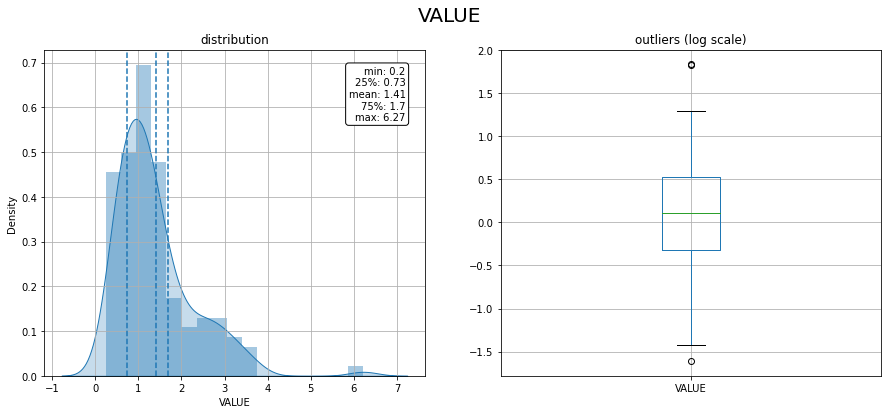

In [66]:
# Verificando a Distribuição da Variável de Interesse
x = 'VALUE'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = dados_filtrado[x].fillna(dados_filtrado[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dados_filtrado[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(dados_filtrado[x])
tmp_dtf[x] = np.log(dados_filtrado[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

In [67]:
# Verificação da Relação entre as Variáveis

<AxesSubplot:>

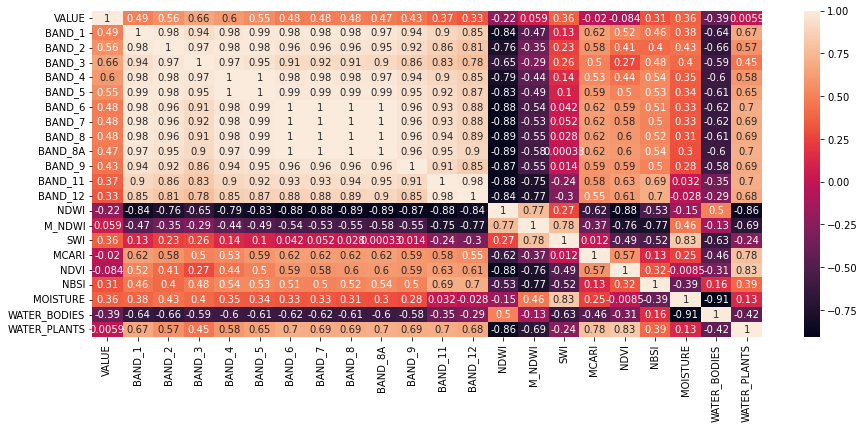

In [68]:
# Matriz de Correlação
sns.heatmap(dados_filtrado.corr(), annot=True) #annot mostra os coeficientes da matriz

In [69]:
# Matriz de Correlação
#dados_filtrado.corr()

In [70]:
# Verificação de Linearidade
#sns.pairplot(dados_filtrado, diag_kind="kde")

In [71]:
dados_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 132
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VALUE         133 non-null    float64
 1   BAND_1        133 non-null    float64
 2   BAND_2        133 non-null    float64
 3   BAND_3        133 non-null    float64
 4   BAND_4        133 non-null    float64
 5   BAND_5        133 non-null    float64
 6   BAND_6        133 non-null    float64
 7   BAND_7        133 non-null    float64
 8   BAND_8        133 non-null    float64
 9   BAND_8A       133 non-null    float64
 10  BAND_9        133 non-null    float64
 11  BAND_11       133 non-null    float64
 12  BAND_12       133 non-null    float64
 13  NDWI          133 non-null    float64
 14  M_NDWI        133 non-null    float64
 15  SWI           133 non-null    float64
 16  MCARI         133 non-null    float64
 17  NDVI          133 non-null    float64
 18  NBSI          133 non-null    

In [72]:
# Verifidando por outro método

IQR_BAND_1 = dados_filtrado.BAND_1.quantile(0.75)-dados_filtrado.BAND_1.quantile(0.25) 
lower_bridge_BAND_1 = dados_filtrado['BAND_1'].quantile(0.25)-(IQR_BAND_1*1.5) 
upper_bridge_BAND_1 = dados_filtrado['BAND_1'].quantile(0.75)+(IQR_BAND_1*1.5)
lower_bridge_BAND_1, upper_bridge_BAND_1

IQR_BAND_2 = dados_filtrado.BAND_2.quantile(0.75)-dados_filtrado.BAND_2.quantile(0.25) 
lower_bridge_BAND_2 = dados_filtrado['BAND_2'].quantile(0.25)-(IQR_BAND_2*1.5) 
upper_bridge_BAND_2 = dados_filtrado['BAND_2'].quantile(0.75)+(IQR_BAND_2*1.5)
lower_bridge_BAND_2, upper_bridge_BAND_2

IQR_BAND_3 = dados_filtrado.BAND_3.quantile(0.75)-dados_filtrado.BAND_3.quantile(0.25) 
lower_bridge_BAND_3 = dados_filtrado['BAND_3'].quantile(0.25)-(IQR_BAND_3*1.5) 
upper_bridge_BAND_3 = dados_filtrado['BAND_3'].quantile(0.75)+(IQR_BAND_3*1.5)
lower_bridge_BAND_3, upper_bridge_BAND_3

IQR_BAND_4 = dados_filtrado.BAND_4.quantile(0.75)-dados_filtrado.BAND_4.quantile(0.25) 
lower_bridge_BAND_4 = dados_filtrado['BAND_4'].quantile(0.25)-(IQR_BAND_4*1.5) 
upper_bridge_BAND_4 = dados_filtrado['BAND_4'].quantile(0.75)+(IQR_BAND_4*1.5)
lower_bridge_BAND_4, upper_bridge_BAND_4

IQR_BAND_5 = dados_filtrado.BAND_5.quantile(0.75)-dados_filtrado.BAND_5.quantile(0.25) 
lower_bridge_BAND_5 = dados_filtrado['BAND_5'].quantile(0.25)-(IQR_BAND_5*1.5) 
upper_bridge_BAND_5 = dados_filtrado['BAND_5'].quantile(0.75)+(IQR_BAND_5*1.5)
lower_bridge_BAND_5, upper_bridge_BAND_5

IQR_BAND_6 = dados_filtrado.BAND_6.quantile(0.75)-dados_filtrado.BAND_6.quantile(0.25) 
lower_bridge_BAND_6 = dados_filtrado['BAND_6'].quantile(0.25)-(IQR_BAND_6*1.5) 
upper_bridge_BAND_6 = dados_filtrado['BAND_6'].quantile(0.75)+(IQR_BAND_6*1.5)
lower_bridge_BAND_6, upper_bridge_BAND_6

IQR_BAND_7 = dados_filtrado.BAND_7.quantile(0.75)-dados_filtrado.BAND_7.quantile(0.25) 
lower_bridge_BAND_7 = dados_filtrado['BAND_7'].quantile(0.25)-(IQR_BAND_7*1.5) 
upper_bridge_BAND_7 = dados_filtrado['BAND_7'].quantile(0.75)+(IQR_BAND_7*1.5)
lower_bridge_BAND_7, upper_bridge_BAND_7

IQR_BAND_8 = dados_filtrado.BAND_8.quantile(0.75)-dados_filtrado.BAND_8.quantile(0.25) 
lower_bridge_BAND_8 = dados_filtrado['BAND_8'].quantile(0.25)-(IQR_BAND_8*1.5) 
upper_bridge_BAND_8 = dados_filtrado['BAND_8'].quantile(0.75)+(IQR_BAND_8*1.5)
lower_bridge_BAND_8, upper_bridge_BAND_8

IQR_BAND_8A = dados_filtrado.BAND_8A.quantile(0.75)-dados_filtrado.BAND_8A.quantile(0.25) 
lower_bridge_BAND_8A = dados_filtrado['BAND_8A'].quantile(0.25)-(IQR_BAND_8A*1.5) 
upper_bridge_BAND_8A = dados_filtrado['BAND_8A'].quantile(0.75)+(IQR_BAND_8A*1.5)
lower_bridge_BAND_8A, upper_bridge_BAND_8A

IQR_BAND_9 = dados_filtrado.BAND_9.quantile(0.75)-dados_filtrado.BAND_9.quantile(0.25) 
lower_bridge_BAND_9 = dados_filtrado['BAND_9'].quantile(0.25)-(IQR_BAND_9*1.5) 
upper_bridge_BAND_9 = dados_filtrado['BAND_9'].quantile(0.75)+(IQR_BAND_9*1.5)
lower_bridge_BAND_9, upper_bridge_BAND_9

IQR_BAND_11 = dados_filtrado.BAND_11.quantile(0.75)-dados_filtrado.BAND_11.quantile(0.25) 
lower_bridge_BAND_11 = dados_filtrado['BAND_11'].quantile(0.25)-(IQR_BAND_11*1.5) 
upper_bridge_BAND_11 = dados_filtrado['BAND_11'].quantile(0.75)+(IQR_BAND_11*1.5)
lower_bridge_BAND_11, upper_bridge_BAND_11

IQR_BAND_12 = dados_filtrado.BAND_12.quantile(0.75)-dados_filtrado.BAND_12.quantile(0.25) 
lower_bridge_BAND_12 = dados_filtrado['BAND_12'].quantile(0.25)-(IQR_BAND_12*1.5) 
upper_bridge_BAND_12 = dados_filtrado['BAND_12'].quantile(0.75)+(IQR_BAND_12*1.5)
lower_bridge_BAND_12, upper_bridge_BAND_12

(-47.5, 156.5)

In [73]:
dados_filtrado.describe()

,VALUE,BAND_1,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7,BAND_8,BAND_8A,...,BAND_12,NDWI,M_NDWI,SWI,MCARI,NDVI,NBSI,MOISTURE,WATER_BODIES,WATER_PLANTS
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,1.411654,292.676692,376.135338,469.548872,232.075188,203.030075,153.578947,158.526316,136.729323,132.669173,...,59.225564,0.604088,0.737458,0.446357,20.896967,-0.304242,-0.273805,0.235823,0.461833,-0.090676
std,0.998062,169.726632,176.070268,195.812390,163.864441,162.908970,144.897990,142.035238,124.533197,123.598674,...,45.714300,0.141039,0.111708,0.157960,9.572856,0.116447,0.083313,0.143255,0.330978,0.052031
min,0.200000,99.000000,164.000000,254.000000,92.000000,69.000000,38.000000,52.000000,38.000000,23.000000,...,7.000000,0.279605,0.450882,-0.004608,-30.497664,-0.612053,-0.441016,-0.180723,-0.182680,-0.237736
25%,0.730000,187.000000,267.000000,322.000000,129.000000,106.000000,70.000000,76.000000,64.000000,59.000000,...,29.000000,0.533898,0.653846,0.345679,15.530435,-0.404878,-0.339695,0.155556,0.246878,-0.121076
50%,1.110000,213.000000,308.000000,411.000000,150.000000,119.000000,83.000000,89.000000,78.000000,74.000000,...,43.000000,0.622857,0.722222,0.439490,20.320000,-0.278287,-0.282645,0.244444,0.438728,-0.090090
75%,1.700000,313.000000,394.000000,528.000000,238.000000,202.000000,132.000000,148.000000,118.000000,120.000000,...,80.000000,0.722222,0.835616,0.558824,25.275547,-0.212614,-0.207207,0.348315,0.616802,-0.048193
max,6.270000,699.000000,809.000000,961.000000,669.000000,642.000000,556.000000,561.000000,499.000000,494.000000,...,199.000000,0.829978,0.917910,0.792453,42.696341,-0.124378,-0.055238,0.569620,1.766667,-0.005338


In [74]:
# Desvio Padrão - Determinação do Limite de Corte - Bandas

print('Verificação dos Limites de Corte das Bandas Espectrais:')
print(f'*Desvio Padrão da Banda_1: {dados_filtrado.BAND_1.std()}')
print(f'*Desvio Padrão da Banda_2: {dados_filtrado.BAND_2.std()}')
print(f'*Desvio Padrão da Banda_3: {dados_filtrado.BAND_3.std()}')
print(f'*Desvio Padrão da Banda_4: {dados_filtrado.BAND_4.std()}')
print(f'*Desvio Padrão da Banda_5: {dados_filtrado.BAND_5.std()}')
print(f'*Desvio Padrão da Banda_6: {dados_filtrado.BAND_6.std()}')
print(f'*Desvio Padrão da Banda_7: {dados_filtrado.BAND_7.std()}')
print(f'*Desvio Padrão da Banda_8: {dados_filtrado.BAND_8.std()}')
print(f'*Desvio Padrão da Banda_8A: {dados_filtrado.BAND_8A.std()}')
print(f'*Desvio Padrão da Banda_9: {dados_filtrado.BAND_9.std()}')
print(f'*Desvio Padrão da Banda_11: {dados_filtrado.BAND_11.std()}')
print(f'*Desvio Padrão da Banda_12: {dados_filtrado.BAND_12.std()}')



print('---------------------------------------------------------------------')


print('Para Prosseguir Sem Efetuar Filtros por Desvio Padrão: Digite 1: ')
print('Para Prosseguir Filtrar por Valores do Desvio Padrão: Digite 2:  ')
print('Para Prosseguir Filtrar por Valores InterQuartis: Digite 3:  ')

usar_todos_dados = int(input())

# --------------------------------------------

if usar_todos_dados==2:

    print('---------------------------------------------------------------------')
    print('Filtro de Bandas Realizado por Desvio Padrão: ')
    print('---------------------------------------------------------------------')
    print('Digite o Valor pelo qual o Desvio Padrão Deverá ser Multiplicado (inteiro): ')
    valor_multiplica_desvio_padrao = int(input())

    print(f'*O Valor Limite de Corte da Banda_1 é : {dados_filtrado.BAND_1.std() * valor_multiplica_desvio_padrao}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_1'] > dados_filtrado.BAND_1.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print('Filtro de Bandas Realizado por Intervalos InterQuartis: ')
    print(f'*O Valor Limite de Corte da Banda_2 é : {dados_filtrado.BAND_2.std() * valor_multiplica_desvio_padrao}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_2'] > dados_filtrado.BAND_2.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_3 é : {dados_filtrado.BAND_3.std() * valor_multiplica_desvio_padrao}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_3'] > dados_filtrado.BAND_3.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_4 é : {dados_filtrado.BAND_4.std() * valor_multiplica_desvio_padrao}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_4'] > dados_filtrado.BAND_4.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_5 é : {dados_filtrado.BAND_5.std() * valor_multiplica_desvio_padrao}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_5'] > dados_filtrado.BAND_5.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_6 é : {dados_filtrado.BAND_6.std() * valor_multiplica_desvio_padrao}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_6'] > dados_filtrado.BAND_6.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_7 é : {dados_filtrado.BAND_7.std() * valor_multiplica_desvio_padrao}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_7'] > dados_filtrado.BAND_7.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_8 é : {dados_filtrado.BAND_8.std() * valor_multiplica_desvio_padrao}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_8'] > dados_filtrado.BAND_8.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_8A é : {dados_filtrado.BAND_8A.std() * valor_multiplica_desvio_padrao}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_8A'] > dados_filtrado.BAND_8A.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_9 é : {dados_filtrado.BAND_9.std() * valor_multiplica_desvio_padrao}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_9'] > dados_filtrado.BAND_9.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_11 é : {dados_filtrado.BAND_11.std() * valor_multiplica_desvio_padrao}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_11'] > dados_filtrado.BAND_11.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_12 é : {dados_filtrado.BAND_12.std() * valor_multiplica_desvio_padrao}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_12'] > dados_filtrado.BAND_12.std() * valor_multiplica_desvio_padrao].index, inplace = True)
    print('---------------------------------------------------------------------')

# ---------------------------------------------------
    
if usar_todos_dados==3:

    print('---------------------------------------------------------------------')
    print('Filtro de Bandas Realizado por Intervalos InterQuartis: ')
    print('---------------------------------------------------------------------')

    print(f'*O Valor Limite de Corte da Banda_1 é : {upper_bridge_BAND_1}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_1'] > upper_bridge_BAND_1].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print('Filtro de Bandas Realizado por Intervalos InterQuartis: ')
    print(f'*O Valor Limite de Corte da Banda_2 é : {upper_bridge_BAND_2}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_2'] > upper_bridge_BAND_2].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_3 é : {upper_bridge_BAND_3}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_3'] > upper_bridge_BAND_3].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_4 é : {upper_bridge_BAND_4}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_4'] > upper_bridge_BAND_4].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_5 é : {upper_bridge_BAND_5}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_5'] > upper_bridge_BAND_5].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_6 é : {upper_bridge_BAND_6}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_6'] > upper_bridge_BAND_6].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_7 é : {upper_bridge_BAND_7}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_7'] > upper_bridge_BAND_7].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_8 é : {upper_bridge_BAND_8}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_8'] > upper_bridge_BAND_8].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_8A é : {upper_bridge_BAND_8A}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_8A'] > upper_bridge_BAND_8A].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_9 é : {upper_bridge_BAND_9}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_9'] > upper_bridge_BAND_9].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_11 é : {upper_bridge_BAND_11}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_11'] > upper_bridge_BAND_11].index, inplace = True)
    print('---------------------------------------------------------------------')
    
    print(f'*O Valor Limite de Corte da Banda_12 é : {upper_bridge_BAND_12}')
    dados_filtrado.drop(dados_filtrado[dados_filtrado['BAND_12'] > upper_bridge_BAND_12].index, inplace = True)
    print('---------------------------------------------------------------------')

# ---------------------------------------
    
else:    
    dados_filtrado = dados_filtrado.copy()



#dados_filtrado.head()
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro por Desvio Padrão/InterQuartis : {dados_filtrado.shape[0]}')

Verificação dos Limites de Corte das Bandas Espectrais:
*Desvio Padrão da Banda_1: 169.72663175932755
*Desvio Padrão da Banda_2: 176.0702675653348
*Desvio Padrão da Banda_3: 195.8123895763421
*Desvio Padrão da Banda_4: 163.86444065141856
*Desvio Padrão da Banda_5: 162.9089697406622
*Desvio Padrão da Banda_6: 144.89798974525803
*Desvio Padrão da Banda_7: 142.03523778249476
*Desvio Padrão da Banda_8: 124.53319673153415
*Desvio Padrão da Banda_8A: 123.59867373298631
*Desvio Padrão da Banda_9: 142.82654701982662
*Desvio Padrão da Banda_11: 61.75468984564
*Desvio Padrão da Banda_12: 45.7142999544293
---------------------------------------------------------------------
Para Prosseguir Sem Efetuar Filtros por Desvio Padrão: Digite 1: 
Para Prosseguir Filtrar por Valores do Desvio Padrão: Digite 2:  
Para Prosseguir Filtrar por Valores InterQuartis: Digite 3:  
1
*Quantidade de Dados Disponíveis Após Aplicação do Filtro por Desvio Padrão/InterQuartis : 133


In [75]:
dados_filtrado.describe()

,VALUE,BAND_1,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7,BAND_8,BAND_8A,...,BAND_12,NDWI,M_NDWI,SWI,MCARI,NDVI,NBSI,MOISTURE,WATER_BODIES,WATER_PLANTS
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,1.411654,292.676692,376.135338,469.548872,232.075188,203.030075,153.578947,158.526316,136.729323,132.669173,...,59.225564,0.604088,0.737458,0.446357,20.896967,-0.304242,-0.273805,0.235823,0.461833,-0.090676
std,0.998062,169.726632,176.070268,195.812390,163.864441,162.908970,144.897990,142.035238,124.533197,123.598674,...,45.714300,0.141039,0.111708,0.157960,9.572856,0.116447,0.083313,0.143255,0.330978,0.052031
min,0.200000,99.000000,164.000000,254.000000,92.000000,69.000000,38.000000,52.000000,38.000000,23.000000,...,7.000000,0.279605,0.450882,-0.004608,-30.497664,-0.612053,-0.441016,-0.180723,-0.182680,-0.237736
25%,0.730000,187.000000,267.000000,322.000000,129.000000,106.000000,70.000000,76.000000,64.000000,59.000000,...,29.000000,0.533898,0.653846,0.345679,15.530435,-0.404878,-0.339695,0.155556,0.246878,-0.121076
50%,1.110000,213.000000,308.000000,411.000000,150.000000,119.000000,83.000000,89.000000,78.000000,74.000000,...,43.000000,0.622857,0.722222,0.439490,20.320000,-0.278287,-0.282645,0.244444,0.438728,-0.090090
75%,1.700000,313.000000,394.000000,528.000000,238.000000,202.000000,132.000000,148.000000,118.000000,120.000000,...,80.000000,0.722222,0.835616,0.558824,25.275547,-0.212614,-0.207207,0.348315,0.616802,-0.048193
max,6.270000,699.000000,809.000000,961.000000,669.000000,642.000000,556.000000,561.000000,499.000000,494.000000,...,199.000000,0.829978,0.917910,0.792453,42.696341,-0.124378,-0.055238,0.569620,1.766667,-0.005338


In [76]:
# Desvio Padrão - Determinação do Limite de Corte - Variável de Interesse

print('Verificação do Limite de Corte da Variável de Interesse:')
print(f'*Desvio Padrão da Variável de Interesse: {dados_filtrado.VALUE.std()}')
print('Para Prosseguir Sem Efetuar Filtros por Desvio Padrão: Digite 1: ')
print('Para Prosseguir Filtrar por Valores do Desvio Padrão: Digite 2:  ')
print('Para Prosseguir Filtrar por Valores InterQuartis: Digite 3:  ')

usar_todos_dados = int(input())

if usar_todos_dados==2:
    print('Filtro por Desvio Padrão: ')
    print('Digite o Valor pelo qual o Desvio Padrão Deverá ser Multiplicado (inteiro): ')
    valor_multiplica_desvio_padrao = int(input())
    
    limite_corte_variavel_desvio_padrao = valor_multiplica_desvio_padrao * dados_filtrado.VALUE.std()
    
    print(f'*O Valor Limite de Corte é : {limite_corte_variavel_desvio_padrao}')

    dados_filtrado.drop(dados_filtrado[dados_filtrado['VALUE'] > limite_corte_variavel_desvio_padrao].index, inplace = True)

elif usar_todos_dados==3:
    print('Filtro por Intervalos InterQuartis: ')
    IQR=dados_filtrado.VALUE.quantile(0.75)-dados_filtrado.VALUE.quantile(0.25) 
    lower_bridge=dados_filtrado['VALUE'].quantile(0.25)-(IQR*1.5) 
    upper_bridge=dados_filtrado['VALUE'].quantile(0.75)+(IQR*1.5)
    
    print(f'*O Valor Limite de Corte é : {upper_bridge}')

    dados_filtrado.drop(dados_filtrado[dados_filtrado['VALUE'] > upper_bridge].index, inplace = True)
    
else:    
    dados_filtrado = dados_filtrado.copy()
    #valor_limite = 'Sem Limitacao'
    #diferenca_dias = 'Sem Limitacao'


#dados_filtrado.head()
print(f'*Quantidade de Dados Disponíveis Após Aplicação do Filtro por Desvio Padrão/InterQuartis : {dados_filtrado.shape[0]}')

Verificação do Limite de Corte da Variável de Interesse:
*Desvio Padrão da Variável de Interesse: 0.9980618949434311
Para Prosseguir Sem Efetuar Filtros por Desvio Padrão: Digite 1: 
Para Prosseguir Filtrar por Valores do Desvio Padrão: Digite 2:  
Para Prosseguir Filtrar por Valores InterQuartis: Digite 3:  
1
*Quantidade de Dados Disponíveis Após Aplicação do Filtro por Desvio Padrão/InterQuartis : 133


In [77]:
#dados_filtrado.info()

/home/peixe/0_anaconda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


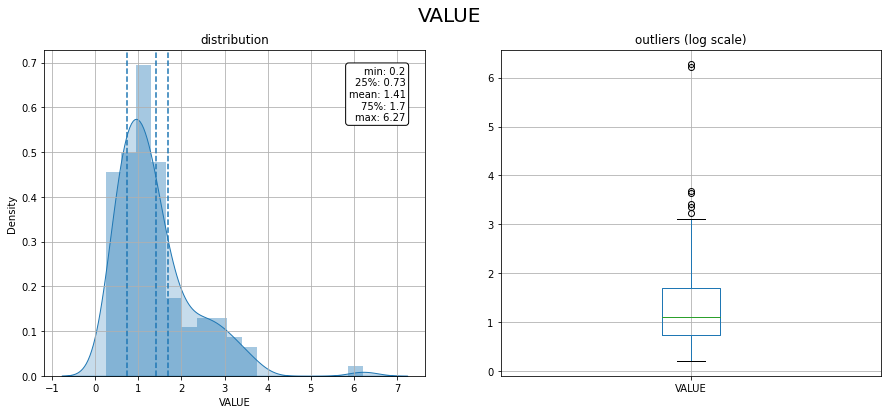

In [78]:
# Nova verificação da Distribução após corte de valores de bandas
x = 'VALUE'
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = dados_filtrado[x].fillna(dados_filtrado[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dados_filtrado[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(dados_filtrado[x])
#tmp_dtf[x] = np.log(dados_filtrado[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

In [79]:
# Selecionando as Bandas Espectrais de Interesse

In [80]:
#Filtro de Bandas Espectrais de Interesse

print('Quais variáveis de entrada vc quer utlizar?')
print('Digite 1 para sim ou 0 para Não')
print('1: Selecionar as 12 bandas espectrais')
print('2: Selecionar TODAS as VARIÁVEIS DE ENTRADA disponíveis')
print('0: Informar as bandas de interesse')

usar_todas_bandas = int(input())
print('------------------------------------------------------')

if usar_todas_bandas==0:
    print('------------------------------------------------------')
    print('Digite uma lista com as bandas espectrais desejadas')
    print('Digite Todas: para selecionar todas as 12 bandas simultaneamente')
    print('Ou')
    print('Digite as bandas desejadas. Exemplo: band_1 band_2 band_3')
    print('------------------------------------------------------')
    bandas = (input()).upper()
    bandas = bandas.split()
    bandas.append('VALUE')
    #bandas, len(bandas)
    dados_filtrado1 = dados_filtrado[bandas]

    
if usar_todas_bandas == 1:
    dados_filtrado1 = dados_filtrado[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12','VALUE']]
    bandas = dados_filtrado1.columns
    
    
else:    
    #turb_filtrado1 = turb_filtrado[turb_filtrado.columns]
    #dados_filtrado1 = dados_filtrado[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12','VALUE']]
    
    #dados_filtrado1 = dados_filtrado[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12', 'NDWI', 'SWI', 'VALUE']]
    
    #dados_filtrado1 = dados_filtrado[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12', 'NDWI', 'M_NDWI','SWI', 'MCARI','VALUE']]
    
    dados_filtrado1 = dados_filtrado[['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12', 'NDWI', 'M_NDWI','SWI', 'MCARI', 'NDVI', 'NBSI', 'MOISTURE', 'WATER_BODIES','WATER_PLANTS', 'VALUE']]
    
    bandas = dados_filtrado1.columns
    

dados_filtrado1.head()


Quais variáveis de entrada vc quer utlizar?
Digite 1 para sim ou 0 para Não
1: Selecionar as 12 bandas espectrais
2: Selecionar TODAS as VARIÁVEIS DE ENTRADA disponíveis
0: Informar as bandas de interesse
1
------------------------------------------------------


,BAND_1,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7,BAND_8,BAND_8A,BAND_9,BAND_11,BAND_12,VALUE
0,313.0,367.0,375.0,193.0,177.0,145.0,153.0,133.0,134.0,145.0,84.0,69.0,0.24
1,354.0,418.0,427.0,241.0,228.0,190.0,196.0,175.0,163.0,164.0,115.0,87.0,0.20
2,288.0,334.0,348.0,177.0,153.0,123.0,132.0,113.0,109.0,109.0,55.0,49.0,0.65
3,297.0,340.0,362.0,174.0,158.0,128.0,129.0,110.0,107.0,115.0,60.0,46.0,0.32
4,302.0,363.0,444.0,200.0,174.0,131.0,138.0,117.0,103.0,94.0,57.0,38.0,0.53


In [81]:
# Separando bandas da variável dependente para filtros futuros
bandas = bandas[0:(len(bandas)-1)]
bandas

Index(['BAND_1', 'BAND_2', 'BAND_3', 'BAND_4', 'BAND_5', 'BAND_6', 'BAND_7',
       'BAND_8', 'BAND_8A', 'BAND_9', 'BAND_11', 'BAND_12'],
      dtype='object')

In [82]:
# Ajustando Fator de Escala de Bandas Espectrais: 1/10.000

In [83]:
lista_multiplicar_bandas = ['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12']

In [84]:
dados_filtrado1[lista_multiplicar_bandas] = dados_filtrado1[lista_multiplicar_bandas].multiply(0.0001)

/home/peixe/0_anaconda/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [85]:
dados_filtrado1

,BAND_1,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7,BAND_8,BAND_8A,BAND_9,BAND_11,BAND_12,VALUE
0,0.0313,0.0367,0.0375,0.0193,0.0177,0.0145,0.0153,0.0133,0.0134,0.0145,0.0084,0.0069,0.24
1,0.0354,0.0418,0.0427,0.0241,0.0228,0.0190,0.0196,0.0175,0.0163,0.0164,0.0115,0.0087,0.20
2,0.0288,0.0334,0.0348,0.0177,0.0153,0.0123,0.0132,0.0113,0.0109,0.0109,0.0055,0.0049,0.65
3,0.0297,0.0340,0.0362,0.0174,0.0158,0.0128,0.0129,0.0110,0.0107,0.0115,0.0060,0.0046,0.32
4,0.0302,0.0363,0.0444,0.0200,0.0174,0.0131,0.0138,0.0117,0.0103,0.0094,0.0057,0.0038,0.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.0699,0.0809,0.0961,0.0653,0.0601,0.0487,0.0483,0.0419,0.0413,0.0450,0.0181,0.0123,3.67
129,0.0671,0.0747,0.0785,0.0565,0.0559,0.0503,0.0504,0.0440,0.0430,0.0491,0.0181,0.0115,1.04
130,0.0673,0.0741,0.0761,0.0537,0.0525,0.0459,0.0448,0.0395,0.0378,0.0494,0.0171,0.0113,1.18
131,0.0670,0.0730,0.0771,0.0540,0.0523,0.0476,0.0464,0.0397,0.0389,0.0466,0.0183,0.0127,1.06


# Preparando para Gravar dados que serão utilizados nos modelos de IA
'''
arquivo_utilizado = str(nome_arquivo + '_' + str(len(dados_filtrado1)) + '_dados_' +
    str(valor_limite) + '_IntervaloDados_' +
    str(diferenca_dias) + '_DiferencaDias_' +
    str(len(bandas)) + '_bandas.xlsx')

#arquivo_utilizado

pasta_raiz = r'C:\Users\peixe\simoa_1'

#str(pasta_raiz)+'\\'+nome_arquivo


# Criar pasta
pasta_gravacao = str(pasta_raiz)+'\\'+nome_arquivo
if not os.path.exists(pasta_gravacao):
    os.makedirs(pasta_gravacao)
    

# Caminho do arquivo
caminho_arquivo = str(pasta_gravacao) +'\\'+ str(arquivo_utilizado)
#caminho_arquivo


# Gravar dados
dados_filtrado1.to_excel(caminho_arquivo)

# Limpa o nome do arquivo após a gravação
caminho_arquivo = ''
'''

In [86]:
# PyWedge

In [87]:
#!pip install pywedge

In [88]:
#import pywedge as pw

In [89]:
#mc = pw.Pywedge_Charts(dados_filtrado1, c=None, y="VALUE")
#chart = mc.make_charts()

In [90]:
#from pandas_profiling import ProfileReport

In [91]:
#profile = ProfileReport(dados_filtrado1, title="Pandas Profiling Report", explorative=True)

In [92]:
#profile.to_notebook_iframe()

In [93]:
#import sweetviz as sv
 
# generate report
#sweet_report = sv.analyze(dados_filtrado1)

In [94]:
#sweet_report.show_html()

In [95]:
#compare_report = sv.compare([y_test,"teste"], [predictions,"predicao"], "output")
 # show output within notebook file
#compare_report.show_html()

In [96]:
#bandas =['BAND_1', 'BAND_3', 'BAND_5', 'BAND_11']
#bandas =['BAND_1', 'BAND_3', 'BAND_5']

In [97]:
# Tempo de execução de Algoritmos

In [98]:
# Verificar tempo - Início
tempo_inicial = time.time() # em segundos

In [99]:
# Função Linear - Aplicação da OLS

In [100]:
# Montando Função Linear - Parte 1

string_funcao_linear_part1 = ''

for x in bandas:
    string_funcao_linear_part1 += '+' + x

#print(string_funcao_linear_part1)

string_funcao_linear_part1 = string_funcao_linear_part1[1:len(string_funcao_linear_part1)]

#print(string_funcao_linear_part1)

#############################################

# Montando Função Linear - Parte 2

string_funcao_linear_part2 = 'VALUE ~ ' + string_funcao_linear_part1
print('Função Linear: ',string_funcao_linear_part2)

Função Linear:  VALUE ~ BAND_1+BAND_2+BAND_3+BAND_4+BAND_5+BAND_6+BAND_7+BAND_8+BAND_8A+BAND_9+BAND_11+BAND_12


In [101]:
# Regressão Linear - Função OLS

print('------------------------------------------------------------------------------')
print('--------------------------------Resultados------------------------------------')
print(f'*Valor Limite do parâmetro: {valor_limite} / *Diferença de Data: {diferenca_dias}')
print('------------------------------------------------------------------------------')

result = sm.ols(formula=string_funcao_linear_part2, data=dados_filtrado1).fit()
print(result.summary())

------------------------------------------------------------------------------
--------------------------------Resultados------------------------------------
*Valor Limite do parâmetro: Sem Limitacao / *Diferença de Data: Sem Limitacao
------------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                  VALUE   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     24.69
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           6.02e-27
Time:                        01:20:23   Log-Likelihood:                -105.24
No. Observations:                 133   AIC:                             236.5
Df Residuals:                     120   BIC:                             274.1
Df Model:                          12                

In [102]:
## Função Linear - Verificaçaõ dos Resultados

In [103]:
# Pegando os parâmetros da Função Linear OLS
result.params, result.params[0]

(Intercept      1.010055
 BAND_1       -43.501382
 BAND_2       -41.689810
 BAND_3        -7.832103
 BAND_4       258.588237
 BAND_5       -35.503700
 BAND_6      -170.093064
 BAND_7        39.771308
 BAND_8       124.407738
 BAND_8A      -20.837682
 BAND_9       -16.382418
 BAND_11     -136.828310
 BAND_12       26.696528
 dtype: float64,
 1.0100553162128458)

In [104]:
# Pegando os valores dos parâmetros
var = result.params
var[1]
var

Intercept      1.010055
BAND_1       -43.501382
BAND_2       -41.689810
BAND_3        -7.832103
BAND_4       258.588237
BAND_5       -35.503700
BAND_6      -170.093064
BAND_7        39.771308
BAND_8       124.407738
BAND_8A      -20.837682
BAND_9       -16.382418
BAND_11     -136.828310
BAND_12       26.696528
dtype: float64

In [105]:
# Separando variáveis dependentes e independentes
X1 = dados_filtrado1[bandas]
y1 = dados_filtrado1['VALUE']

In [106]:
# Aplicando a Equação Linear
# novas colunas

if len(bandas) == 12:
    y_teste_ols1 = var[0] + var[1]*X1['BAND_1'] + var[2]*X1['BAND_2'] + var[3]*X1['BAND_3'] + var[4]*X1['BAND_4'] + var[5]*X1['BAND_5'] + var[6]*X1['BAND_6'] + var[7]*X1['BAND_7'] + var[8]*X1['BAND_8'] + var[9]*X1['BAND_8A'] + var[10]*X1['BAND_9'] + var[11]*X1['BAND_11'] + var[12]*X1['BAND_12']
else:
    y_teste_ols1 = var[0] + var[1]*X1['BAND_1'] + var[2]*X1['BAND_2'] + var[3]*X1['BAND_3'] + var[4]*X1['BAND_4'] + var[5]*X1['BAND_5'] + var[6]*X1['BAND_6'] + var[7]*X1['BAND_7'] + var[8]*X1['BAND_8'] + var[9]*X1['BAND_8A'] + var[10]*X1['BAND_9'] + var[11]*X1['BAND_11'] + var[12]*X1['BAND_12'] + var[13]*X1['NDWI'] + var[14]*X1['M_NDWI'] +var[15]*X1['SWI'] + var[16]*X1['MCARI'] + var[17]*X1['NDVI'] + var[18]*X1['NBSI'] + var[19]*X1['MOISTURE'] + var[20]*X1['WATER_BODIES'] + var[21]*X1['WATER_PLANTS']

    

# 21 bandas
#y_teste_ols1 = var[0] + var[1]*X1['BAND_1'] + var[2]*X1['BAND_2'] + var[3]*X1['BAND_3'] + var[4]*X1['BAND_4'] + var[5]*X1['BAND_5'] + var[6]*X1['BAND_6'] + var[7]*X1['BAND_7'] + var[8]*X1['BAND_8'] + var[9]*X1['BAND_8A'] + var[10]*X1['BAND_9'] + var[11]*X1['BAND_11'] + var[12]*X1['BAND_12'] + var[13]*X1['NDWI'] + var[14]*X1['M_NDWI'] +var[15]*X1['SWI'] + var[16]*X1['MCARI'] + var[17]*X1['NDVI'] + var[18]*X1['NBSI'] + var[19]*X1['MOISTURE'] + var[20]*X1['WATER_BODIES'] + var[21]*X1['WATER_PLANTS']


# y_teste_ols1 = var[0] + var[1]*X1['BAND_1'] + var[2]*X1['BAND_2'] + var[3]*X1['BAND_3'] + var[4]*X1['BAND_4'] + var[5]*X1['BAND_5'] + var[6]*X1['BAND_6'] + var[7]*X1['BAND_7'] + var[8]*X1['BAND_8'] + var[9]*X1['BAND_8A'] + var[10]*X1['BAND_9'] + var[11]*X1['BAND_11'] + var[12]*X1['BAND_12'] + var[13]*X1['NDWI'] + var[14]*X1['M_NDWI'] +var[15]*X1['SWI'] + var[16]*X1['MCARI']


#y_teste_ols1 = var[0] + var[1]*X1['BAND_1'] + var[2]*X1['BAND_2'] + var[3]*X1['BAND_3'] + var[4]*X1['BAND_4'] + var[5]*X1['BAND_5'] + var[6]*X1['BAND_6'] + var[7]*X1['BAND_7'] + var[8]*X1['BAND_8'] + var[9]*X1['BAND_8A'] + var[10]*X1['BAND_9'] + var[11]*X1['BAND_11'] + var[12]*X1['BAND_12'] + var[13]*X1['NDWI'] + var[14]*X1['SWI']

# 12 bandas
#y_teste_ols1 = var[0] + var[1]*X1['BAND_1'] + var[2]*X1['BAND_2'] + var[3]*X1['BAND_3'] + var[4]*X1['BAND_4'] + var[5]*X1['BAND_5'] + var[6]*X1['BAND_6'] + var[7]*X1['BAND_7'] + var[8]*X1['BAND_8'] + var[9]*X1['BAND_8A'] + var[10]*X1['BAND_9'] + var[11]*X1['BAND_11'] + var[12]*X1['BAND_12']

#y_teste_ols1 = var[0] + var[1]*X1['BAND_1'] + var[2]*X1['BAND_2'] + var[3]*X1['BAND_3'] + var[4]*X1['BAND_4'] + var[5]*X1['BAND_5'] + var[6]*X1['BAND_8A']

#y_teste_ols1 = var[0] + var[1]*X1['BAND_1'] + var[2]*X1['BAND_3'] + var[3]*X1['BAND_5'] # + var[4]*X1['BAND_11']


# Resultado da Aplicação da Função
y_teste_ols_previsto1 = y_teste_ols1.values
#y_teste_ols_previsto1

In [107]:
# Valor original da variável idependente
y_teste_ols_verdadeiro1 = y1.values
#y_teste_ols_verdadeiro1

In [108]:
# Regressão Linear
print('------------------------------------------------------------------------------')
print('--------------------------------Resultados------------------------------------')
print('Função Linear - OLS-----------------------------------------------------------')
metricas(y_teste_ols_verdadeiro1, y_teste_ols_previsto1)

------------------------------------------------------------------------------
--------------------------------Resultados------------------------------------
Função Linear - OLS-----------------------------------------------------------
Method:  Vazio
R2 =  0.7117456218580749
MSE =  0.28497919308115416
RMSE =  0.5338344247808998
MAE =  0.2768590664119011
MAPE =  0.23596584647476104


In [109]:
# Selecionar bandas
#bandas = bandas_importantes

In [110]:
# Codigo do Tipo de Algoritmo
# 1- Linear
# 2 - Árvore de Decisão
# 3- Agrupamento
# 4- Gradient Boosting
# 5- Rede Neural

In [111]:
# Selecionando variáveis independentes
#global X
#X = dados_filtrado1[bandas].values
#X
#X.shape

In [112]:
def seleciona_dados_variaveis_indepentes_x(codigo_tipo_algoritmo):
    global X
    global y
    global bandas_utilizadas
    if codigo_tipo_algoritmo in(1, 2, 3, 4):
        X = dados_filtrado1[bandas_mais_frequentes].values
        print(X.shape)
        
        y = dados_filtrado1['VALUE'].values
        print(y.shape)
        
        bandas_utilizadas = bandas_mais_frequentes
    
    else:
        X = dados_filtrado1[bandas].values
        print(X.shape)
        
        y = dados_filtrado1['VALUE'].values
        print(y.shape)
        
        bandas_utilizadas = bandas
    
    return X, y

In [113]:
# Settando as variáveis X e y com todos os dados
seleciona_dados_variaveis_indepentes_x(5)
clear_output()

In [114]:
X.shape

(133, 12)

In [115]:
y.shape

(133,)

In [116]:
# Registro de Resultados - Preparação da Tabela

In [117]:
# Tamanho das Amostras de Treino e Teste - Cross-Validation
samples_cv = X.shape[0]

X_test_cv_tamanho = np.ceil(X.shape[0]/5).astype(int)
X_train_cv_tamanho = samples_cv - X_test_cv_tamanho

train_test_cv = str(str(X_train_cv_tamanho) + '/' + str(X_test_cv_tamanho))

#samples_cv, train_test_cv

In [118]:
# Preparando a tabela para gravação

In [119]:
results_frame = pd.DataFrame()
columns_result = ['Method','Samples','Train/Test', 'Split Mode', 'R2', 'MSE', 'RMSE', 'MAE', 'MAPE']

In [120]:
results_frame = pd.DataFrame(columns=columns_result)
results_frame

,Method,Samples,Train/Test,Split Mode,R2,MSE,RMSE,MAE,MAPE


In [121]:
#esvaziar frame (caso haja valores guardados)
results_frame = results_frame[0:0]

In [122]:
# Cross-Validation

In [123]:
# Divisiões do Conjunto de Dados
folds_number = 5

In [124]:
random_fixo = 42

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [126]:
## APLICAÇÃO DOS MODELOS DE INTELIGÊNCIA ARTIFICIAL ##

In [127]:
## Modelos de Inteligência Artificial ##

In [128]:
# Regressão Linear

In [129]:
# Nome do método utilizado
method = 'Linear Regression'

In [130]:
# Selecionando principais bandas para o o tipo de algoritmo
seleciona_dados_variaveis_indepentes_x(5)
#

scores = []
R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

#method = results_frame['Method'].iloc[0]

linear_regression = LinearRegression()

cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

melhor_r2 = 0

for train_index, test_index in cv.split(X):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index, "\n")
    print("Metrics")

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    linear_regression.fit(X_train, y_train)
    scores.append(linear_regression.score(X_test, y_test))
    
    predictions = linear_regression.predict(X_test)
    
    metricas(y_test, predictions)
    
    R2_lista.append(R2)
    MSE_lista.append(MSE)
    RMSE_lista.append(RMSE)
    MAE_lista.append(MAE)
    MAPE_lista.append(MAPE)

    
    if R2 > melhor_r2:
        melhor_r2 = R2
        
        melhor_X_train = sc.fit_transform(X_train)
        melhor_y_train = y_train
        melhor_X_test = sc.transform(X_test)
        melhor_y_test = y_test
    
    #print("---------------------------------------")
    clear_output()

In [131]:
R2 = statistics.mean(R2_lista)
MSE = statistics.mean(MSE_lista)
RMSE = statistics.mean(RMSE_lista)
MAE = statistics.mean(MAE_lista)
MAPE = statistics.mean(MAPE_lista)

#R2, MSE, RMSE, MAE, MAPE

print('Method: ', method)
print("R2 = ", R2)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("MAE = ", MAE)
print("MAPE = ", MAPE)

Method:  Linear Regression
R2 =  0.7086250986917926
MSE =  0.37455663834232955
RMSE =  0.5160396197207423
MAE =  0.3284594958563884
MAPE =  0.2846428893781657


In [132]:
# Exbindo Resultados
# Cross-Validation

division = 'Cross-Validation'

results_frame = results_frame.append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE},
                                     ignore_index=True)

results_frame

,Method,Samples,Train/Test,Split Mode,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression,133,106/27,Cross-Validation,0.708625,0.374557,0.51604,0.328459,0.284643


In [133]:
# Redes Neurais

In [134]:
taxa_aprendizado = 0.01

In [135]:
epocas = 1000

In [136]:
n_batchs = 128

In [137]:
callback = keras.callbacks.EarlyStopping(
    monitor='val_mae', patience=50, verbose=2, mode='min',
    baseline=None, restore_best_weights=True)

In [138]:
# Neural Comum

In [139]:
# method = 'ANN 5L, 100N'

In [140]:
method = 'ANN 5L, 100N'

In [141]:
# Selecionando principais bandas para o o tipo de algoritmo
#seleciona_dados_variaveis_indepentes_x(1)
seleciona_dados_variaveis_indepentes_x(5)
clear_output()
#

In [142]:
modelo_5L_100 = Sequential()
modelo_5L_100.add(Dense(units = 100, activation = 'relu', input_shape=(len(bandas_utilizadas),)))
#modelo_5L_100.add(Dropout(0.2))
modelo_5L_100.add(Dense(units = 100, activation = 'relu'))
#modelo_5L_100.add(Dropout(0.2))
modelo_5L_100.add(Dense(units = 100, activation = 'relu'))
#modelo_5L_100.add(Dropout(0.2))
modelo_5L_100.add(Dense(units = 100, activation = 'relu'))
#modelo_5L_100.add(Dropout(0.2))
modelo_5L_100.add(Dense(units = 100, activation = 'relu'))
#modelo_5L_100.add(Dropout(0.2))
modelo_5L_100.add(Dense(1))

2022-09-29 01:20:24.411633: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-29 01:20:24.411692: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-29 01:20:24.411723: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (peixe-VirtualBox): /proc/driver/nvidia/version does not exist


In [143]:
Optimizer = tf.keras.optimizers.Adam(learning_rate = taxa_aprendizado)

In [144]:
modelo_5L_100.compile(Optimizer, loss='mse', metrics=["mae","mse"])

In [145]:
#scores = []
R2_lista, MSE_lista, RMSE_lista, MAE_lista, MAPE_lista = [], [], [], [], []

#method = results_frame['Method'].iloc[0]

cv = KFold(n_splits=folds_number, random_state=random_fixo, shuffle=True)

melhor_r2 = 0

for train_index, test_index in cv.split(X):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index, "\n")
    print("Metrics")

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    
    
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    
    history_5L_100 = modelo_5L_100.fit(X_train , y_train , validation_data=(X_test , y_test) ,
                           callbacks=[callback],
                           epochs=epocas, batch_size=n_batchs)
    
    predictions = modelo_5L_100.predict(X_test)
    
    metricas(y_test, predictions)
    
    R2_lista.append(R2)
    MSE_lista.append(MSE)
    RMSE_lista.append(RMSE)
    MAE_lista.append(MAE)
    MAPE_lista.append(MAPE)

    
    if R2 > melhor_r2:
        melhor_r2 = R2
        
        melhor_X_train = sc.fit_transform(X_train)
        melhor_y_train = y_train
        melhor_X_test = sc.transform(X_test)
        melhor_y_test = y_test
    
    #print("---------------------------------------")
    clear_output()

In [146]:
R2 = statistics.mean(R2_lista)
MSE = statistics.mean(MSE_lista)
RMSE = statistics.mean(RMSE_lista)
MAE = statistics.mean(MAE_lista)
MAPE = statistics.mean(MAPE_lista)

#R2, MSE, RMSE, MAE, MAPE

print('Method: ', method)
print("R2 = ", R2)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("MAE = ", MAE)
print("MAPE = ", MAPE)

Method:  ANN 5L, 100N
R2 =  0.949641000526959
MSE =  0.03452822106312263
RMSE =  0.18079257854930417
MAE =  0.13105861354961015
MAPE =  0.10159825389557808


In [147]:
# Exbindo Resultados
# Cross-Validation

division = 'Cross-Validation'

results_frame = results_frame.append({'Method': method,
                                      'Samples': samples_cv,
                                      'Train/Test': train_test_cv,
                                      'Split Mode': division,
                                      'R2': R2,
                                      'MSE': MSE,
                                      'RMSE': RMSE,
                                      'MAE': MAE,
                                      'MAPE': MAPE},
                                     ignore_index=True)

results_frame

,Method,Samples,Train/Test,Split Mode,R2,MSE,RMSE,MAE,MAPE
0,Linear Regression,133,106/27,Cross-Validation,0.708625,0.374557,0.516040,0.328459,0.284643
1,"ANN 5L, 100N",133,106/27,Cross-Validation,0.949641,0.034528,0.180793,0.131059,0.101598


In [16]:
import sys
'geopandas' in sys.modules
!pip install geopandas

^C


In [19]:
import pandas as pd
import geopandas as gpd

In [22]:
dados = gpd.read_file('4_Converter_Shape/B01.shp')
dados.head()

,VALUE,geometry
0,0.05250,"POLYGON ((466540.000 7988920.000, 466540.000 7..."
1,0.05895,"POLYGON ((466560.000 7988920.000, 466560.000 7..."
2,0.06540,"POLYGON ((466580.000 7988920.000, 466580.000 7..."
3,0.05390,"POLYGON ((466540.000 7988900.000, 466540.000 7..."
4,0.05650,"POLYGON ((466560.000 7988900.000, 466560.000 7..."


In [23]:
dados.shape

(2132649, 2)

In [24]:
dados.rename(columns = {'VALUE': 'BAND_1'},
                      inplace=True)
dados.head()

,BAND_1,geometry
0,0.05250,"POLYGON ((466540.000 7988920.000, 466540.000 7..."
1,0.05895,"POLYGON ((466560.000 7988920.000, 466560.000 7..."
2,0.06540,"POLYGON ((466580.000 7988920.000, 466580.000 7..."
3,0.05390,"POLYGON ((466540.000 7988900.000, 466540.000 7..."
4,0.05650,"POLYGON ((466560.000 7988900.000, 466560.000 7..."


In [25]:
#b1 = gpd.read_file('B01.shp')
#dados['BAND_1'] = b1['VALUE']
#b1.head()

In [27]:
b2 = gpd.read_file('4_Converter_Shape/B02.shp')
dados['BAND_2'] = b2['VALUE']
del(b2)
dados.head()

,BAND_1,geometry,BAND_2
0,0.05250,"POLYGON ((466540.000 7988920.000, 466540.000 7...",0.0458
1,0.05895,"POLYGON ((466560.000 7988920.000, 466560.000 7...",0.0438
2,0.06540,"POLYGON ((466580.000 7988920.000, 466580.000 7...",0.0436
3,0.05390,"POLYGON ((466540.000 7988900.000, 466540.000 7...",0.0784
4,0.05650,"POLYGON ((466560.000 7988900.000, 466560.000 7...",0.0452


In [28]:
b3 = gpd.read_file('4_Converter_Shape/B03.shp')
dados['BAND_3'] = b3['VALUE']
del(b3)
dados.head()

,BAND_1,geometry,BAND_2,BAND_3
0,0.05250,"POLYGON ((466540.000 7988920.000, 466540.000 7...",0.0458,0.079200
1,0.05895,"POLYGON ((466560.000 7988920.000, 466560.000 7...",0.0438,0.070950
2,0.06540,"POLYGON ((466580.000 7988920.000, 466580.000 7...",0.0436,0.074450
3,0.05390,"POLYGON ((466540.000 7988900.000, 466540.000 7...",0.0784,0.124650
4,0.05650,"POLYGON ((466560.000 7988900.000, 466560.000 7...",0.0452,0.077175


In [29]:
b4 = gpd.read_file('4_Converter_Shape/B04.shp')
dados['BAND_4'] = b4['VALUE']
del(b4)
dados.head()

,BAND_1,geometry,BAND_2,BAND_3,BAND_4
0,0.05250,"POLYGON ((466540.000 7988920.000, 466540.000 7...",0.0458,0.079200,0.087325
1,0.05895,"POLYGON ((466560.000 7988920.000, 466560.000 7...",0.0438,0.070950,0.075700
2,0.06540,"POLYGON ((466580.000 7988920.000, 466580.000 7...",0.0436,0.074450,0.085250
3,0.05390,"POLYGON ((466540.000 7988900.000, 466540.000 7...",0.0784,0.124650,0.168675
4,0.05650,"POLYGON ((466560.000 7988900.000, 466560.000 7...",0.0452,0.077175,0.081725


In [30]:
b5 = gpd.read_file('4_Converter_Shape/B05.shp')
dados['BAND_5'] = b5['VALUE']
del(b5)
dados.head()

,BAND_1,geometry,BAND_2,BAND_3,BAND_4,BAND_5
0,0.05250,"POLYGON ((466540.000 7988920.000, 466540.000 7...",0.0458,0.079200,0.087325,0.1449
1,0.05895,"POLYGON ((466560.000 7988920.000, 466560.000 7...",0.0438,0.070950,0.075700,0.1148
2,0.06540,"POLYGON ((466580.000 7988920.000, 466580.000 7...",0.0436,0.074450,0.085250,0.1106
3,0.05390,"POLYGON ((466540.000 7988900.000, 466540.000 7...",0.0784,0.124650,0.168675,0.2276
4,0.05650,"POLYGON ((466560.000 7988900.000, 466560.000 7...",0.0452,0.077175,0.081725,0.1424


In [31]:
b6 = gpd.read_file('4_Converter_Shape/B06.shp')
dados['BAND_6'] = b6['VALUE']
del(b6)
dados.head()

,BAND_1,geometry,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6
0,0.05250,"POLYGON ((466540.000 7988920.000, 466540.000 7...",0.0458,0.079200,0.087325,0.1449,0.2749
1,0.05895,"POLYGON ((466560.000 7988920.000, 466560.000 7...",0.0438,0.070950,0.075700,0.1148,0.2132
2,0.06540,"POLYGON ((466580.000 7988920.000, 466580.000 7...",0.0436,0.074450,0.085250,0.1106,0.1525
3,0.05390,"POLYGON ((466540.000 7988900.000, 466540.000 7...",0.0784,0.124650,0.168675,0.2276,0.3330
4,0.05650,"POLYGON ((466560.000 7988900.000, 466560.000 7...",0.0452,0.077175,0.081725,0.1424,0.2650


In [32]:
b7 = gpd.read_file('4_Converter_Shape/B07.shp')
dados['BAND_7'] = b7['VALUE']
del(b7)
dados.head()

,BAND_1,geometry,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7
0,0.05250,"POLYGON ((466540.000 7988920.000, 466540.000 7...",0.0458,0.079200,0.087325,0.1449,0.2749,0.3225
1,0.05895,"POLYGON ((466560.000 7988920.000, 466560.000 7...",0.0438,0.070950,0.075700,0.1148,0.2132,0.2563
2,0.06540,"POLYGON ((466580.000 7988920.000, 466580.000 7...",0.0436,0.074450,0.085250,0.1106,0.1525,0.1687
3,0.05390,"POLYGON ((466540.000 7988900.000, 466540.000 7...",0.0784,0.124650,0.168675,0.2276,0.3330,0.3804
4,0.05650,"POLYGON ((466560.000 7988900.000, 466560.000 7...",0.0452,0.077175,0.081725,0.1424,0.2650,0.3124


In [33]:
b8 = gpd.read_file('4_Converter_Shape/B08.shp')
dados['BAND_8'] = b8['VALUE']
del(b8)
dados.head()

,BAND_1,geometry,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7,BAND_8
0,0.05250,"POLYGON ((466540.000 7988920.000, 466540.000 7...",0.0458,0.079200,0.087325,0.1449,0.2749,0.3225,0.321150
1,0.05895,"POLYGON ((466560.000 7988920.000, 466560.000 7...",0.0438,0.070950,0.075700,0.1148,0.2132,0.2563,0.276525
2,0.06540,"POLYGON ((466580.000 7988920.000, 466580.000 7...",0.0436,0.074450,0.085250,0.1106,0.1525,0.1687,0.140125
3,0.05390,"POLYGON ((466540.000 7988900.000, 466540.000 7...",0.0784,0.124650,0.168675,0.2276,0.3330,0.3804,0.364650
4,0.05650,"POLYGON ((466560.000 7988900.000, 466560.000 7...",0.0452,0.077175,0.081725,0.1424,0.2650,0.3124,0.309425


In [34]:
b8a = gpd.read_file('4_Converter_Shape/B08A.shp')
dados['BAND_8A'] = b8a['VALUE']
del(b8a)
dados.head()

,BAND_1,geometry,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7,BAND_8,BAND_8A
0,0.05250,"POLYGON ((466540.000 7988920.000, 466540.000 7...",0.0458,0.079200,0.087325,0.1449,0.2749,0.3225,0.321150,0.3752
1,0.05895,"POLYGON ((466560.000 7988920.000, 466560.000 7...",0.0438,0.070950,0.075700,0.1148,0.2132,0.2563,0.276525,0.3043
2,0.06540,"POLYGON ((466580.000 7988920.000, 466580.000 7...",0.0436,0.074450,0.085250,0.1106,0.1525,0.1687,0.140125,0.2044
3,0.05390,"POLYGON ((466540.000 7988900.000, 466540.000 7...",0.0784,0.124650,0.168675,0.2276,0.3330,0.3804,0.364650,0.4128
4,0.05650,"POLYGON ((466560.000 7988900.000, 466560.000 7...",0.0452,0.077175,0.081725,0.1424,0.2650,0.3124,0.309425,0.3628


In [35]:
b9 = gpd.read_file('4_Converter_Shape/B09.shp')
dados['BAND_9'] = b9['VALUE']
del(b9)
dados.head()

,BAND_1,geometry,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7,BAND_8,BAND_8A,BAND_9
0,0.05250,"POLYGON ((466540.000 7988920.000, 466540.000 7...",0.0458,0.079200,0.087325,0.1449,0.2749,0.3225,0.321150,0.3752,0.0724
1,0.05895,"POLYGON ((466560.000 7988920.000, 466560.000 7...",0.0438,0.070950,0.075700,0.1148,0.2132,0.2563,0.276525,0.3043,0.0765
2,0.06540,"POLYGON ((466580.000 7988920.000, 466580.000 7...",0.0436,0.074450,0.085250,0.1106,0.1525,0.1687,0.140125,0.2044,0.0806
3,0.05390,"POLYGON ((466540.000 7988900.000, 466540.000 7...",0.0784,0.124650,0.168675,0.2276,0.3330,0.3804,0.364650,0.4128,0.0830
4,0.05650,"POLYGON ((466560.000 7988900.000, 466560.000 7...",0.0452,0.077175,0.081725,0.1424,0.2650,0.3124,0.309425,0.3628,0.0791


In [36]:
b11 = gpd.read_file('4_Converter_Shape/B11.shp')
dados['BAND_11'] = b11['VALUE']
del(b11)
dados.head()

,BAND_1,geometry,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7,BAND_8,BAND_8A,BAND_9,BAND_11
0,0.05250,"POLYGON ((466540.000 7988920.000, 466540.000 7...",0.0458,0.079200,0.087325,0.1449,0.2749,0.3225,0.321150,0.3752,0.0724,0.3095
1,0.05895,"POLYGON ((466560.000 7988920.000, 466560.000 7...",0.0438,0.070950,0.075700,0.1148,0.2132,0.2563,0.276525,0.3043,0.0765,0.2578
2,0.06540,"POLYGON ((466580.000 7988920.000, 466580.000 7...",0.0436,0.074450,0.085250,0.1106,0.1525,0.1687,0.140125,0.2044,0.0806,0.2000
3,0.05390,"POLYGON ((466540.000 7988900.000, 466540.000 7...",0.0784,0.124650,0.168675,0.2276,0.3330,0.3804,0.364650,0.4128,0.0830,0.3733
4,0.05650,"POLYGON ((466560.000 7988900.000, 466560.000 7...",0.0452,0.077175,0.081725,0.1424,0.2650,0.3124,0.309425,0.3628,0.0791,0.2994


In [37]:
b12 = gpd.read_file('4_Converter_Shape/B12.shp')
dados['BAND_12'] = b12['VALUE']
del(b12)
dados.head()

,BAND_1,geometry,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7,BAND_8,BAND_8A,BAND_9,BAND_11,BAND_12
0,0.05250,"POLYGON ((466540.000 7988920.000, 466540.000 7...",0.0458,0.079200,0.087325,0.1449,0.2749,0.3225,0.321150,0.3752,0.0724,0.3095,0.1728
1,0.05895,"POLYGON ((466560.000 7988920.000, 466560.000 7...",0.0438,0.070950,0.075700,0.1148,0.2132,0.2563,0.276525,0.3043,0.0765,0.2578,0.1357
2,0.06540,"POLYGON ((466580.000 7988920.000, 466580.000 7...",0.0436,0.074450,0.085250,0.1106,0.1525,0.1687,0.140125,0.2044,0.0806,0.2000,0.1259
3,0.05390,"POLYGON ((466540.000 7988900.000, 466540.000 7...",0.0784,0.124650,0.168675,0.2276,0.3330,0.3804,0.364650,0.4128,0.0830,0.3733,0.2432
4,0.05650,"POLYGON ((466560.000 7988900.000, 466560.000 7...",0.0452,0.077175,0.081725,0.1424,0.2650,0.3124,0.309425,0.3628,0.0791,0.2994,0.1681


In [38]:
colunas_base = ['geometry', 'BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12']
dados = dados[colunas_base]
dados.head()

,geometry,BAND_1,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7,BAND_8,BAND_8A,BAND_9,BAND_11,BAND_12
0,"POLYGON ((466540.000 7988920.000, 466540.000 7...",0.05250,0.0458,0.079200,0.087325,0.1449,0.2749,0.3225,0.321150,0.3752,0.0724,0.3095,0.1728
1,"POLYGON ((466560.000 7988920.000, 466560.000 7...",0.05895,0.0438,0.070950,0.075700,0.1148,0.2132,0.2563,0.276525,0.3043,0.0765,0.2578,0.1357
2,"POLYGON ((466580.000 7988920.000, 466580.000 7...",0.06540,0.0436,0.074450,0.085250,0.1106,0.1525,0.1687,0.140125,0.2044,0.0806,0.2000,0.1259
3,"POLYGON ((466540.000 7988900.000, 466540.000 7...",0.05390,0.0784,0.124650,0.168675,0.2276,0.3330,0.3804,0.364650,0.4128,0.0830,0.3733,0.2432
4,"POLYGON ((466560.000 7988900.000, 466560.000 7...",0.05650,0.0452,0.077175,0.081725,0.1424,0.2650,0.3124,0.309425,0.3628,0.0791,0.2994,0.1681


In [40]:
# codigo bruno
dados.to_pickle("mapa.pkl")

In [42]:
#testar load do arquivo salvo
unpickled_df = pd.read_pickle("mapa.pkl")
unpickled_df

In [169]:
colunas_interesse = colunas_base = ['BAND_1','BAND_2','BAND_3','BAND_4','BAND_5','BAND_6','BAND_7','BAND_8','BAND_8A','BAND_9','BAND_11','BAND_12']

In [170]:
X_atributos = dados[colunas_interesse].values

In [171]:
X_atributos

array([[0.05249999, 0.0458    , 0.0792    , ..., 0.0724    , 0.30950001,
        0.17279999],
       [0.05895   , 0.04379999, 0.07095   , ..., 0.0765    , 0.25780001,
        0.13569999],
       [0.0654    , 0.0436    , 0.07445   , ..., 0.0806    , 0.19999999,
        0.1259    ],
       ...,
       [0.0434    , 0.05879999, 0.1116    , ..., 0.01935   , 0.0256    ,
        0.0209    ],
       [0.0431    , 0.0632    , 0.11472499, ..., 0.02945   , 0.0288    ,
        0.0238    ],
       [0.0431    , 0.0625    , 0.11652499, ..., 0.02945   , 0.0302    ,
        0.0239    ]])

In [172]:
X_atributos = sc.transform(X_atributos)
X_atributos

array([[ 1.38467003,  0.47314024,  1.63914975, ...,  4.2727703 ,
        49.46010494, 36.69622257],
       [ 1.76859671,  0.35942448,  1.21974122, ...,  4.56440224,
        40.98915343, 28.54107226],
       [ 2.1525228 ,  0.34805353,  1.39767211, ...,  4.85603419,
        31.51872467, 26.38688381],
       ...,
       [ 0.84300746,  1.21228846,  3.28628145, ...,  0.49933744,
         2.94360167,  3.30626972],
       [ 0.82515043,  1.46246247,  3.44514781, ...,  1.21774784,
         3.46791589,  3.9437343 ],
       [ 0.82515043,  1.42266215,  3.53665512, ...,  1.21774784,
         3.69730335,  3.96571584]])

In [173]:
y_previsoes_atributos = modelo_5L_100.predict(X_atributos)

2022-09-29 01:59:15.569425: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 102367152 exceeds 10% of free system memory.
2022-09-29 01:59:15.838605: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17061192 exceeds 10% of free system memory.
2022-09-29 01:59:15.842049: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17061192 exceeds 10% of free system memory.
2022-09-29 01:59:15.861626: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 17061192 exceeds 10% of free system memory.


In [174]:
#y_previsoes_atributos = linear_regression.predict(X_atributos)

In [175]:
y_previsoes_atributos.shape

(2132649, 1)

In [176]:
atributos_previstos = dados.copy()
del(dados)
atributos_previstos.head()

,geometry,BAND_1,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7,BAND_8,BAND_8A,BAND_9,BAND_11,BAND_12
0,"POLYGON ((466540.000 7988920.000, 466540.000 7...",0.05250,0.0458,0.079200,0.087325,0.1449,0.2749,0.3225,0.321150,0.3752,0.0724,0.3095,0.1728
1,"POLYGON ((466560.000 7988920.000, 466560.000 7...",0.05895,0.0438,0.070950,0.075700,0.1148,0.2132,0.2563,0.276525,0.3043,0.0765,0.2578,0.1357
2,"POLYGON ((466580.000 7988920.000, 466580.000 7...",0.06540,0.0436,0.074450,0.085250,0.1106,0.1525,0.1687,0.140125,0.2044,0.0806,0.2000,0.1259
3,"POLYGON ((466540.000 7988900.000, 466540.000 7...",0.05390,0.0784,0.124650,0.168675,0.2276,0.3330,0.3804,0.364650,0.4128,0.0830,0.3733,0.2432
4,"POLYGON ((466560.000 7988900.000, 466560.000 7...",0.05650,0.0452,0.077175,0.081725,0.1424,0.2650,0.3124,0.309425,0.3628,0.0791,0.2994,0.1681


In [177]:
atributos_previstos['variavel'] = y_previsoes_atributos
atributos_previstos.head()

,geometry,BAND_1,BAND_2,BAND_3,BAND_4,BAND_5,BAND_6,BAND_7,BAND_8,BAND_8A,BAND_9,BAND_11,BAND_12,variavel
0,"POLYGON ((466540.000 7988920.000, 466540.000 7...",0.05250,0.0458,0.079200,0.087325,0.1449,0.2749,0.3225,0.321150,0.3752,0.0724,0.3095,0.1728,0.238659
1,"POLYGON ((466560.000 7988920.000, 466560.000 7...",0.05895,0.0438,0.070950,0.075700,0.1148,0.2132,0.2563,0.276525,0.3043,0.0765,0.2578,0.1357,0.235903
2,"POLYGON ((466580.000 7988920.000, 466580.000 7...",0.06540,0.0436,0.074450,0.085250,0.1106,0.1525,0.1687,0.140125,0.2044,0.0806,0.2000,0.1259,1.928088
3,"POLYGON ((466540.000 7988900.000, 466540.000 7...",0.05390,0.0784,0.124650,0.168675,0.2276,0.3330,0.3804,0.364650,0.4128,0.0830,0.3733,0.2432,2.165926
4,"POLYGON ((466560.000 7988900.000, 466560.000 7...",0.05650,0.0452,0.077175,0.081725,0.1424,0.2650,0.3124,0.309425,0.3628,0.0791,0.2994,0.1681,0.231279


In [178]:
atributos_previstos_1 = atributos_previstos[['geometry', 'variavel']]
del(atributos_previstos)
atributos_previstos_1.head()

,geometry,variavel
0,"POLYGON ((466540.000 7988920.000, 466540.000 7...",0.238659
1,"POLYGON ((466560.000 7988920.000, 466560.000 7...",0.235903
2,"POLYGON ((466580.000 7988920.000, 466580.000 7...",1.928088
3,"POLYGON ((466540.000 7988900.000, 466540.000 7...",2.165926
4,"POLYGON ((466560.000 7988900.000, 466560.000 7...",0.231279


In [179]:
atributos_previstos_1.shape

(2132649, 2)

In [ ]:
atributos_previstos_1['variavel'].describe()

In [ ]:
atributos_previstos_1['variavel'].value_counts()

In [180]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,15

In [ ]:
fig, ax = plt.subplots(1, 1)
atributos_previstos_1.plot(column='variavel', legend = True, vmin=0.0, vmax=3, ax=ax)
ax.set_title(variavel_interesse + ' - Modelagem: Reservatório de Três Marias - 21/01/2021')

In [445]:
type(atributos_previstos_1)

geopandas.geodataframe.GeoDataFrame